# PCA and Eigenvalues and Eigenvectors
Logistic Regression


In [16]:
import numpy as np
from tqdm import tqdm

from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Load mnist dataset

In [17]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Original data size: {x_train.shape[1:]}')

# reshape the values
x_train= np.reshape(x_train,(len(x_train) ,28*28))
x_test = np.reshape  (x_test,(len(x_test) ,28*28))
print(f'Reshaped data size: {x_train.shape[-1]}')




Original data size: (28, 28)
Reshaped data size: 784


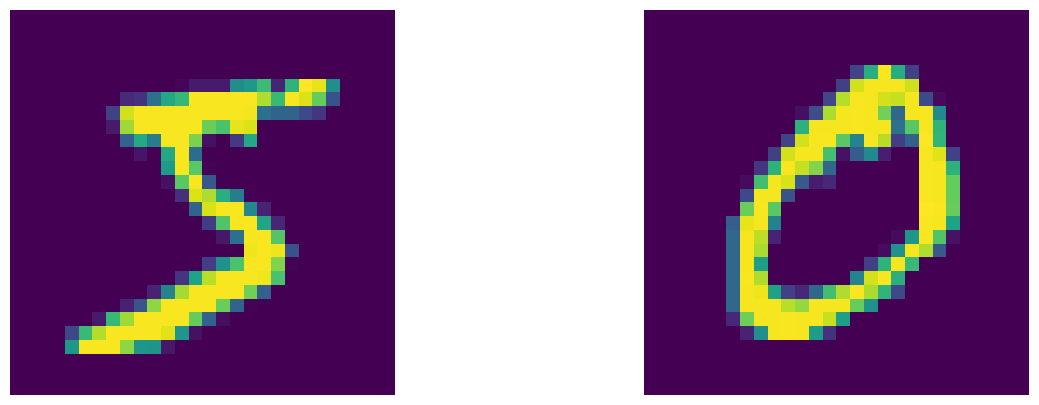

In [18]:
# show some images from the dataset

def show_images(num_images,X):
    _,axes = plt.subplots( 1,num_images , figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(28,28))
        ax.axis('off')

show_images(2,x_train)



In [19]:
# scale the data set to [0 1]

x_train= (x_train - np.min(x_train))/ (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test))/ (np.max(x_test) - np.min(x_test))


## Size reduction analysis on MNIST dataset

### Extract eigenvalues and eigenvectors

In [20]:
# Calcutation of covariance matrix, eigenvalue and eigenvectors of the covariance matrix.

# Center of the data
centered_data = x_train-np.mean(x_train)

# Calculattion of covariance matrix
covariance_matrix = np.dot(centered_data.T,centered_data)/(len(x_train)-1)

# Extract eigenvalue and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)



Select a number of important features with the highest eigenvalues

In [21]:
explained_variance =0.995
# we can change this variable to get more component of datasets.

#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

total_variance= np.sum(eigenvalues)
current_variance = 0
for i in range (len(sorted_eigenvalues)):
    current_variance += sorted_eigenvalues[i]
    if current_variance / total_variance >= explained_variance:
        break

selected_eigenvalues = sorted_eigenvalues[0:i]
selected_eigenvectors = sorted_eigenvectors[:,:i]


# Compression ratio
compression_ratio = len(eigenvalues)/ len(selected_eigenvalues)


# sorted_indices
# sorted_indices
print(f'with the variance of {explained_variance}, {len(selected_eigenvalues)} features are selected from {np.shape(x_test)[-1]}')
print(f'Compression ratio: {compression_ratio:.2f}')



with the variance of 0.995, 361 features are selected from 784
Compression ratio: 2.17


The reduction effect on the image's quality

compress images to size of 19*19


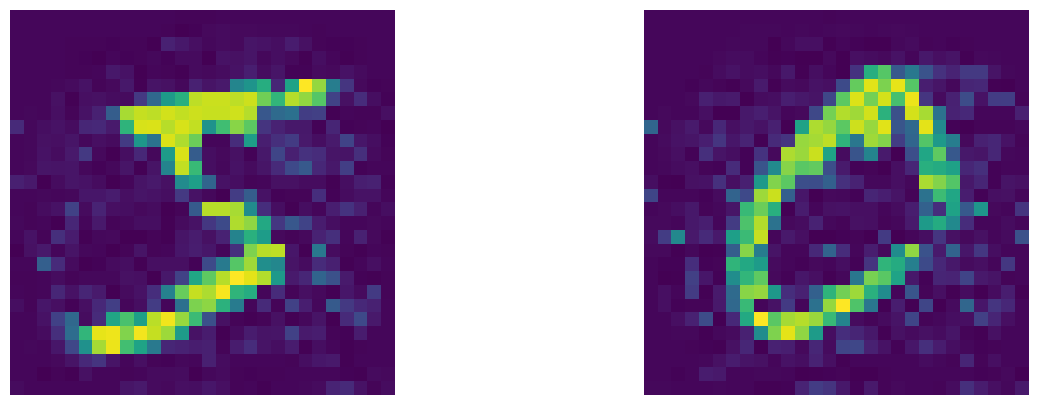

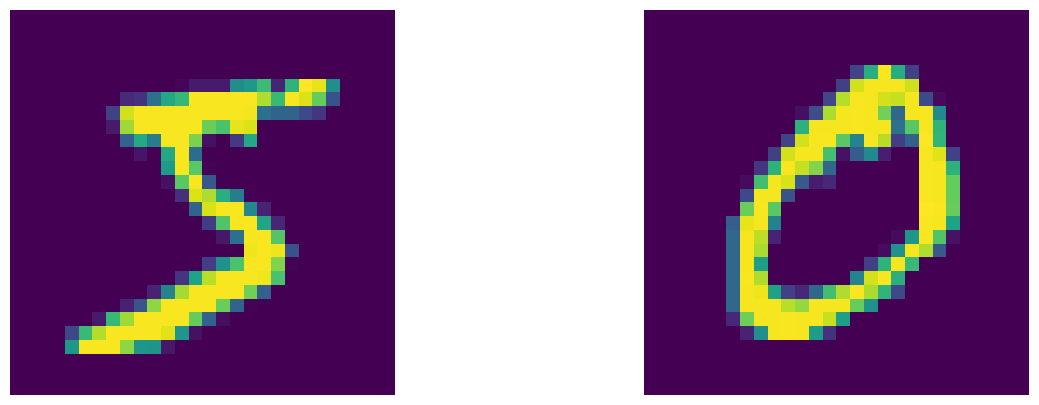

In [22]:
# Project Images into Reduced Dimensionality Eigenbasis F=X*V
# And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose

print(f'compress images to size of {np.sqrt(len(selected_eigenvalues)):.0f}*{np.sqrt(len(selected_eigenvalues)):.0f}')
Reduced_data    = np.dot(x_train,selected_eigenvectors)
Reproject_data  = np.dot(Reduced_data,selected_eigenvectors.T)


show_images(2,abs(Reproject_data))
show_images(2,x_train)


## PCA analysis on MNIST dataset

In [27]:
def do_pca(n_components, data):
  pca = PCA(n_components=n_components, random_state=0)
  pca_data = pca.fit_transform(data)
  R_pca_data = pca.inverse_transform(pca_data)
  #projected_data = R_pca_data.reshape((len(data), 28*28))
  return R_pca_data



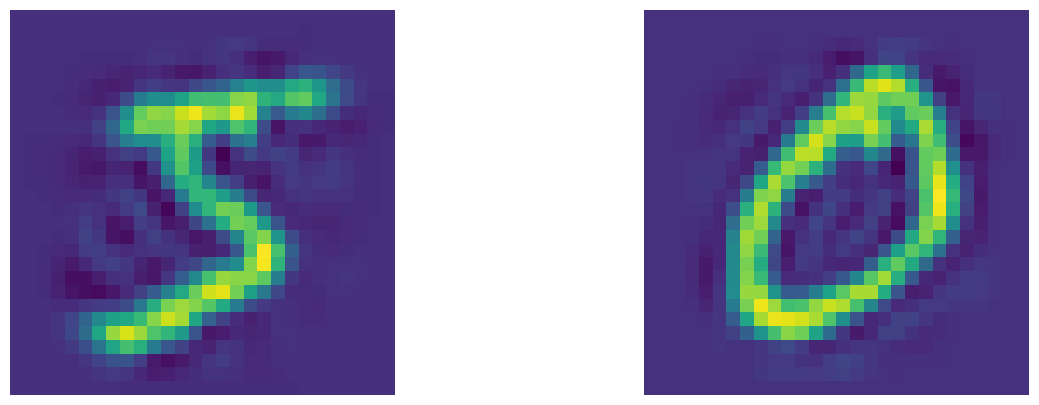

In [28]:
show_images(2,do_pca(100,x_train))

## Accuracy

In [32]:
# a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model_accuracy(X, y, print_output=True):
    y_train , y_test = y
    x_train , x_test = X

    classifier = LogisticRegression(random_state = 0, max_iter=1000)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)

    return acc

In [33]:
# accuracy of projected train data on one ml model on reggression
acc_list, pc_list = [], []

for pc in tqdm(range(2,102,2)):
    new_dataset = do_pca(pc , x_train)
    x_testN = do_pca(pc , x_test)
    X = (new_dataset , x_testN)
    Y = (y_train , y_test)
    pc_list.append(pc)
    acc_list.append( ML_model_accuracy(X, Y))

100%|██████████| 50/50 [25:58<00:00, 31.17s/it]


Text(0, 0.5, 'accuracy')

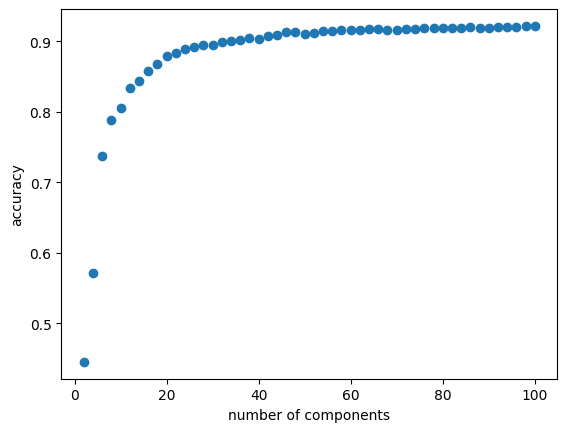

In [34]:
plt.scatter(pc_list,acc_list)
plt.xlabel('number of components')
plt.ylabel('accuracy')

In [35]:
X = (x_train , x_test)
Y = (y_train , y_test)
Max_acc =  ML_model_accuracy(X, Y)

In [44]:
# the number of components that maximize the accuracy and the max accuracy


idx = np.argmax(acc_list)
max = np.max(acc_list)
print(f"the best accuracy is attained in components = {pc_list[idx]}")
print(f"the maximum accuracy that attained is={max}")
print(f"the maximum accurary is={Max_acc}")



the best accuracy is attained in components = 100
the maximum accuracy that attained is=0.922
the maximum accurary is=0.926
